# **Task 1 : Web scraping to gain company insight**



In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []


for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame(reviews,columns=['reviews'])
df.head()

,reviews
0,"Not Verified | Angry, disappointed, and unsat..."
1,"✅ Trip Verified | As an infrequent flyer, Bri..."
2,"Not Verified | A totally unremarkable flight,..."
3,✅ Trip Verified | 1. Ground crew in Heathrow...
4,✅ Trip Verified | London Heathrow to Gibralta...


## **Preprocessing**

In [ ]:
df.to_csv("BA_reviews.csv",index=False)

In [ ]:
for i in range(100):
  print(df.loc[i][0])

Not Verified |  Angry, disappointed, and unsatisfied. My route was from London to Atlanta. My suitcase was not boarded, therefore not landed with me. For both comfort and safety reason, a bag always fly with its passenger and that did not happen. Claims and few phone calls were made by desk assistants who answered my questions unprofessionally and miserably. Certainly, I was left with nothing but my backpack which contained not more than few snacks. Neither clothes nor anything else was ever provided as an apology. Meanwhile, I was also told that my bag would have been delivered through the next 24 hours which also did not happen. British Airways is a great airline to fly with but its organization, when it comes to customer service, is poor and uncertain. Still waiting for my bag.
✅ Trip Verified |  As an infrequent flyer, British Airways was always my first choice. With some reassurance and comfort of service, quality, luggage allowance etc. In fact I’ve never flown with the budget ai

In [ ]:
df['reviews'] = df['reviews'].apply(lambda x : x.split('|'))

In [ ]:
df['verification_status'] = df['reviews'].apply(lambda x : x[0])

In [ ]:
df['reviews'] = df['reviews'].apply(lambda x : x[1])

df.head()


,reviews,verification_status
0,"Angry, disappointed, and unsatisfied. My rou...",Not Verified
1,"As an infrequent flyer, British Airways was ...",✅ Trip Verified
2,"A totally unremarkable flight, on time, as c...",Not Verified
3,1. Ground crew in Heathrow left 60 passenge...,✅ Trip Verified
4,London Heathrow to Gibraltar on 24th October...,✅ Trip Verified


In [ ]:
df.drop('verification_status',axis=1,inplace=True)

In [ ]:
df.head()

,reviews
0,"Angry, disappointed, and unsatisfied. My rou..."
1,"As an infrequent flyer, British Airways was ..."
2,"A totally unremarkable flight, on time, as c..."
3,1. Ground crew in Heathrow left 60 passenge...
4,London Heathrow to Gibraltar on 24th October...


## **Topic Modelling**

In [ ]:
from gensim import corpora, models

In [ ]:
texts = [ [i] for i in df['reviews']]
len(texts)

1000

In [ ]:
dictionary = corpora.Dictionary(texts)  # Here we are assigning unique Id to Each unique words

In [ ]:
dictionary

In [ ]:
corpus = [ dictionary.doc2bow(text) for text in texts]

corpus[0:10] # returns Tuple of values each contains (word_id,word_count)

[[(0, 1)],
 [(1, 1)],
 [(2, 1)],
 [(3, 1)],
 [(4, 1)],
 [(5, 1)],
 [(6, 1)],
 [(7, 1)],
 [(8, 1)],
 [(9, 1)]]

In [ ]:
# Build a topic model (e.g., using Latent Dirichlet Allocation, LDA)

lda_model = models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15)


In [ ]:
# Get the topics

topics = lda_model.print_topics(num_topics=3, num_words=5)

In [ ]:
for i in topics:
  print(i)

(0, '0.002*" After sixteen months of being grounded by COVID, it felt almost surreal to be back in T5, heading for what to us was essential summer sun in Greece. T5 was blissfully quiet, with no queues at check-in or security, and even the Galleries South lounge was less frenetic than usual, despite families with kids similarly desperate to escape Boris Johnson’s bully boy attitude. Ordering food and beverages from one’s table seems something worth continuing, avoiding all the wastage of endlessly replenished buffets. The flights was very quiet, with just 30 pax on board, 9 of whom were in Club Europe. Boarding by row also seemed a welcome improvement on the previous ‘groups’. Service on the flight was good and the food was of the usual Do&Co quality. Landing was ahead of schedule and we were through passport control in just a few minutes after a quick check of vaccination certificates and the passenger locator form. Overall, a thoroughly reassuring, coming out of COVID, experience." +

## **Sentiment Analysis**

In [ ]:
text = [ i for i in df['reviews']]
len(text)

1000

In [ ]:
from textblob import TextBlob

score = []

for i in text:
  sentiment = TextBlob(i)
  score_senti = sentiment.polarity
  score.append(score_senti)

df['score'] = score

df['class'] = df['score'].apply(lambda x : 'positive' if x >= 0.5 else ('negative' if x < 0 else 'neutral') )

In [ ]:
df.head()

,reviews,score,class
0,"Angry, disappointed, and unsatisfied. My rou...",0.024176,neutral
1,"As an infrequent flyer, British Airways was ...",0.118056,neutral
2,"A totally unremarkable flight, on time, as c...",-0.073611,negative
3,1. Ground crew in Heathrow left 60 passenge...,-0.085625,negative
4,London Heathrow to Gibraltar on 24th October...,0.076515,neutral


**Insights**

In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns

In [ ]:
names = df['class'].value_counts().index.tolist()
values = df['class'].value_counts().values.tolist()

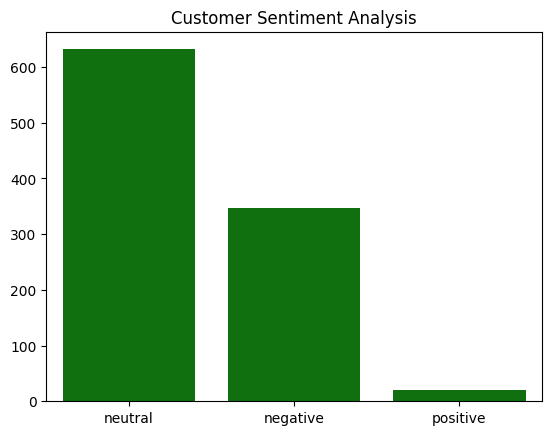

In [ ]:
sns.barplot(x=names,y=values,color='g').set(title='Customer Sentiment Analysis')

plt.show()

## **Word Cloud**

In [ ]:
text = ''.join(text)

In [ ]:
type(text)

str

In [ ]:
import re

cleaned_text = re.sub(r'[^A-Za-z0-9 ]+', '', text)

In [ ]:
cleaned_text

'  Angry disappointed and unsatisfied My route was from London to Atlanta My suitcase was not boarded therefore not landed with me For both comfort and safety reason a bag always fly with its passenger and that did not happen Claims and few phone calls were made by desk assistants who answered my questions unprofessionally and miserably Certainly I was left with nothing but my backpack which contained not more than few snacks Neither clothes nor anything else was ever provided as an apology Meanwhile I was also told that my bag would have been delivered through the next 24 hours which also did not happen British Airways is a great airline to fly with but its organization when it comes to customer service is poor and uncertain Still waiting for my bag  As an infrequent flyer British Airways was always my first choice With some reassurance and comfort of service quality luggage allowance etc In fact Ive never flown with the budget airlines My most recent flight has now changed my view an

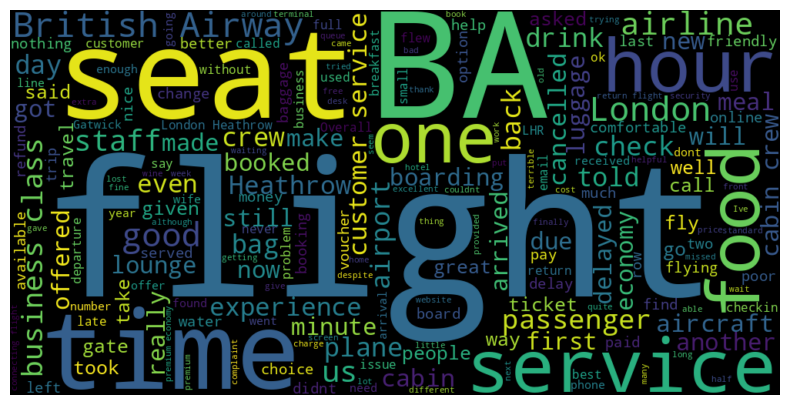

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=1000, height=500).generate(cleaned_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [ ]:
wordcloud

In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm')

doc = nlp(cleaned_text)

# Remove stop words
filtered_tokens = [token.text for token in doc if not token.is_stop]

# Recreate the string without stop words
filtered_text = ' '.join(filtered_tokens)

print(filtered_text)


   Angry disappointed unsatisfied route London Atlanta suitcase boarded landed comfort safety reason bag fly passenger happen Claims phone calls desk assistants answered questions unprofessionally miserably Certainly left backpack contained snacks clothes provided apology told bag delivered 24 hours happen British Airways great airline fly organization comes customer service poor uncertain waiting bag   infrequent flyer British Airways choice reassurance comfort service quality luggage allowance etc fact ve flown budget airlines recent flight changed view causes reflect actually getting money BA flights hour delayed ways cabin ground staff service ok facilities lack disappointed flight Approx 4 half hours thing offered half cup water poured bite sized banana slice cake fact return journey nt offered water BA longer media screen select pass time away nt obligatory flight journey WiFi poor nt access shop fee available explains BAs record profit 152bn question paying sure opt budget airli

In [ ]:
words = filtered_text.split()

In [ ]:
from collections import Counter
word_freq = Counter(words)

In [ ]:
word_freq

Counter({'Angry': 1,
         'disappointed': 29,
         'unsatisfied': 1,
         'route': 53,
         'London': 555,
         'Atlanta': 4,
         'suitcase': 24,
         'boarded': 42,
         'landed': 48,
         'comfort': 22,
         'safety': 11,
         'reason': 41,
         'bag': 159,
         'fly': 193,
         'passenger': 67,
         'happen': 15,
         'Claims': 1,
         'phone': 109,
         'calls': 30,
         'desk': 61,
         'assistants': 1,
         'answered': 13,
         'questions': 8,
         'unprofessionally': 2,
         'miserably': 1,
         'Certainly': 2,
         'left': 120,
         'backpack': 2,
         'contained': 3,
         'snacks': 23,
         'clothes': 18,
         'provided': 63,
         'apology': 23,
         'told': 254,
         'delivered': 27,
         '24': 37,
         'hours': 339,
         'British': 417,
         'Airways': 401,
         'great': 125,
         'airline': 268,
         'organizati

In [ ]:
word , freq = zip(*word_freq.items())

In [ ]:
word = [i for i in word]

freq = [i for i in freq]

In [ ]:
df = pd.DataFrame()
df['word'] = word
df['freq'] = freq

In [ ]:
x = df.groupby('word')['freq'].sum().reset_index()

df = x.nlargest(10,'freq')

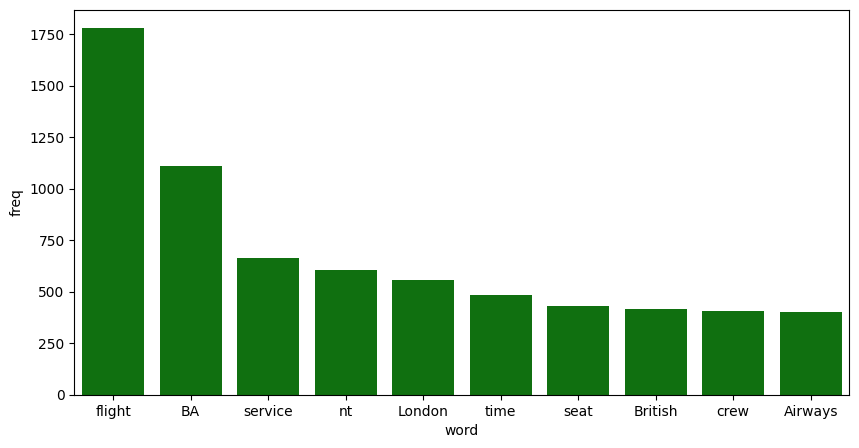

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df,x='word',y='freq',color='g')
plt.show()